<a href="https://colab.research.google.com/github/WeegorMartins/Coffee-Sales/blob/main/Coffee_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [239]:
!pip install pandas plotly dash prophet mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [240]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
from prophet import Prophet
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [241]:
data = pd.read_csv('index.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['day'] = data['datetime'].dt.day
data['day_of_week'] = data['datetime'].dt.dayofweek
data['month'] = data['datetime'].dt.month
data['date'] = data['datetime'].dt.date
print(data.head())

         date                datetime cash_type                 card  money  \
0  2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01 2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01 2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01 2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  hour  day  day_of_week  month  
0          Latte    10    1            4      3  
1  Hot Chocolate    12    1            4      3  
2  Hot Chocolate    12    1            4      3  
3      Americano    13    1            4      3  
4          Latte    13    1            4      3  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [242]:
app = Dash(__name__)
app.layout = html.Div([
    html.H1("Análise Exploratória de Dados"),
    html.Div([
        html.Label('Selecione o Tipo de Café:'),
        dcc.Dropdown(
            id='coffee_dropdown',
            options=[{'label': coffee, 'value': coffee} for coffee in data['coffee_name'].unique()],
            value=data['coffee_name'].unique()[0],
            clearable=False
        )
    ], style={'width': '50%', 'display': 'inline-block'}),
    dcc.Graph(id='coffee_bar_chart'),
    dcc.Graph(id='transactions_line_chart'),
    dcc.Graph(id='money_box_plot'),
    dcc.Graph(id='coffee_pie_chart'),
    dcc.Graph(id='scatter_plot'),
    dcc.Graph(id='histogram'),
    dcc.Graph(id='stacked_bar_chart'),
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [243]:
@app.callback(
    Output('coffee_bar_chart', 'figure'),
    Output('transactions_line_chart', 'figure'),
    Output('money_box_plot', 'figure'),
    Output('coffee_pie_chart', 'figure'),
    Output('scatter_plot', 'figure'),
    Output('histogram', 'figure'),
    Output('stacked_bar_chart', 'figure'),
    Input('coffee_dropdown', 'value')
)
def update_graphs(selected_coffee):
    filtered_data = data[data['coffee_name'] == selected_coffee]

    coffee_frequency = data['coffee_name'].value_counts()
    bar_chart = px.bar(
        coffee_frequency,
        x=coffee_frequency.index,
        y=coffee_frequency.values,
        labels={'x': 'Tipo de Café', 'y': 'Frequência'},
        title='Frequência de Cada Tipo de Café Vendido'
    )

    transactions_per_date = data['date'].value_counts().sort_index()
    line_chart = px.line(
        x=transactions_per_date.index,
        y=transactions_per_date.values,
        labels={'x': 'Data', 'y': 'Número de Transações'},
        title='Número de Transações por Data'
    )

    box_plot = px.box(
        filtered_data,
        y='money',
        labels={'money': 'Valor (R$)'},
        title=f'Distribuição dos Valores das Transações ({selected_coffee})'
    )

    pie_chart = px.pie(
        data,
        names='coffee_name',
        values='money',
        title='Proporção de Vendas de Cada Tipo de Café'
    )

    scatter_plot = px.scatter(
        data,
        x='datetime',
        y='money',
        color='coffee_name',
        labels={'datetime': 'Data e Hora', 'money': 'Valor (R$)'},
        title='Relação entre Tempo e Valor da Transação'
    )

    histogram = px.histogram(
        data,
        x='money',
        nbins=20,
        labels={'money': 'Valor (R$)'},
        title='Distribuição dos Valores das Transações'
    )

    stacked_bar_chart = px.bar(
        data,
        x='date',
        y='money',
        color='coffee_name',
        labels={'date': 'Data', 'money': 'Valor (R$)'},
        title='Quantidade de Vendas por Dia por Tipo de Café'
    )

    return bar_chart, line_chart, box_plot, pie_chart, scatter_plot, histogram, stacked_bar_chart

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [244]:
if __name__ == '__main__':
    app.run_server(debug=False, use_reloader=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

In [245]:
hourly_sales = data.groupby('hour')['money'].sum().reset_index()
hourly_sales_chart = px.line(hourly_sales, x='hour', y='money', labels={'hour': 'Hora do Dia', 'money': 'Valor (R$)'}, title='Vendas por Hora do Dia')
hourly_sales_chart.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [246]:
weekly_sales = data.groupby('day_of_week')['money'].sum().reset_index()
weekly_sales_chart = px.line(weekly_sales, x='day_of_week', y='money', labels={'day_of_week': 'Dia da Semana', 'money': 'Valor (R$)'}, title='Vendas por Dia da Semana')
weekly_sales_chart.update_xaxes(tickvals=[0, 1, 2, 3, 4, 5, 6], ticktext=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
weekly_sales_chart.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [247]:
daily_sales = data.groupby('day')['money'].sum().reset_index()
daily_sales_chart = px.line(daily_sales, x='day', y='money', labels={'day': 'Dia do Mês', 'money': 'Valor (R$)'}, title='Vendas por Dia do Mês')
daily_sales_chart.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [248]:
monthly_sales = data.groupby('month')['money'].sum().reset_index()
monthly_sales_chart = px.line(monthly_sales, x='month', y='money', labels={'month': 'Mês', 'money': 'Valor (R$)'}, title='Vendas por Mês')
monthly_sales_chart.update_xaxes(tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ticktext=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
monthly_sales_chart.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [249]:
time_series_sales = data.groupby('date')['money'].sum().reset_index()
time_series_chart = px.line(time_series_sales, x='date', y='money', labels={'date': 'Data', 'money': 'Valor (R$)'}, title='Vendas Totais ao Longo do Tempo')
time_series_chart.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_a19qzcy/bnimwmt9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_a19qzcy/n5l_lqdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70202', 'data', 'file=/tmp/tmp_a19qzcy/bnimwmt9.json', 'init=/tmp/tmp_a19qzcy/n5l_lqdh.json', 'output', 'file=/tmp/tmp_a19qzcy/prophet_modelu3k1

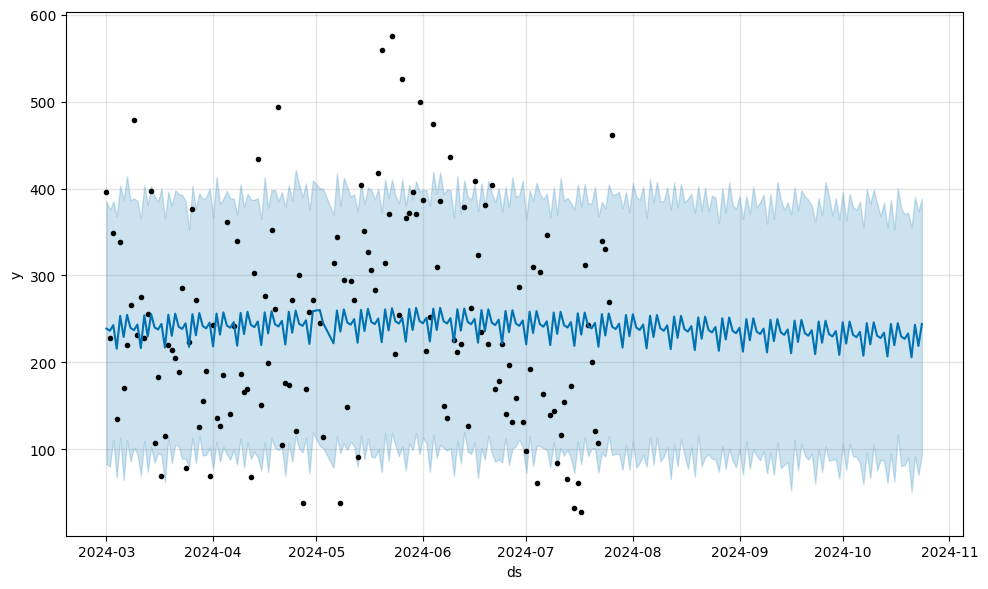

In [252]:
sales_data = data.groupby('date')['money'].sum().reset_index()
sales_data.columns = ['ds', 'y']
model = Prophet()
model.fit(sales_data)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
fig = model.plot(forecast)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



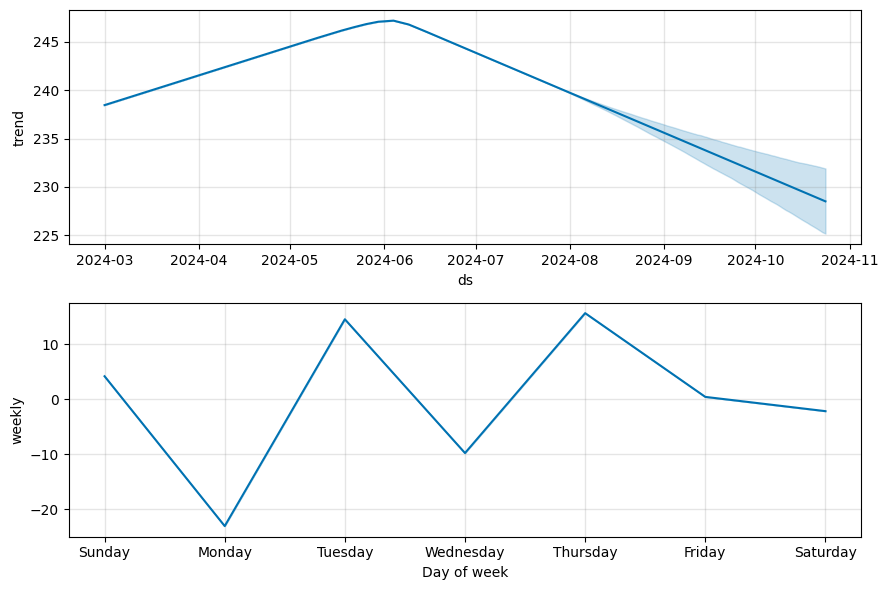

In [253]:
fig2 = model.plot_components(forecast)
fig2.show()

In [254]:
basket = data.pivot_table(index='datetime', columns='coffee_name', values='money', aggfunc='sum').fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head().round(2))
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules.head())

   support               itemsets
0     0.15            (Americano)
1     0.23  (Americano with Milk)
2     0.18           (Cappuccino)
3     0.03                (Cocoa)
4     0.09              (Cortado)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type

